# Machine Learning workflow

by Anaïs Pepey

🦟 In this notebook, we will import open data and apply basic machine learning concepts to analyse the relationship between different variables related to malaria. 

🗣️ Please call Asia or Anaïs if you feel stuck or have any question!

🐍 Happy coding!

## Import libraries

### all-time basics

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### machine learning specifics

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

## 0. Data Exploration and Visualisation

### Understanding our data

🌏 Let's have a look at this data provided by the [World Bank Open Data Page](https://data.worldbank.org/) for the year 2020.

In [4]:
df = pd.read_csv("./data/workshop/worldbank-df.csv")


👇 Display the first five rows of the dataframe `df`.

In [5]:
df.head()

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
0,Bermuda,BMU,Americas,0.0,0,64051.0,18.518518,0.0,100.0,-0.028168,-6.811710,66.048211,81.136000
1,Cayman Islands,CYM,Americas,0.0,0,67327.0,53.000000,0.0,100.0,1.764068,-6.767413,75.582561,NaN
2,Hong Kong,HKG,Asia,0.0,0,NaN,0.000000,0.0,100.0,-0.358933,-6.208755,68.995998,85.497561
3,Macao,MAC,Asia,0.0,0,NaN,0.000000,0.0,100.0,NaN,-55.188681,73.985595,85.184000
4,Kuwait,KWT,Asia,0.0,0,4360451.0,0.350730,0.0,100.0,NaN,-7.169357,75.041788,76.920000


<details><summary markdown='span'>View solution
</summary>

```python
df.head()
```

</details>

🎲 We can also look at random rows, instead of the first 5:

In [6]:
df.sample(5)

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
154,Zambia,ZMB,Africa,186.898620,8846,1.892772e+07,60.283337,55.371000,44.604069,NaN,-5.595733,54.589767,62.380000
128,World,WLD,World,59.523373,624525,7.840953e+09,31.176905,43.938246,90.482703,NaN,-4.030070,64.875490,72.243466
172,Mozambique,MOZ,Africa,320.193970,23693,3.117824e+07,46.725197,62.926000,30.612383,NaN,-4.047643,53.536402,61.172000
168,Bangladesh,BGD,Asia,0.426053,15,1.674209e+08,14.468772,61.823000,96.200000,1.14421,2.271109,67.384859,71.968000
91,Lithuania,LTU,Europe,0.000000,0,2.820269e+06,35.148515,31.954000,100.000000,NaN,-0.051369,64.509861,74.978049


If you re-run the cell, you will obtain 5 different rows. Try it!

Python simplifies our work by providing core functions.

👇 Run the function below to have a look at the shape of the dataframe, which will return its `(number of rows, number of columns)`.

In [7]:
df.shape

(214, 13)

The dataframe `df` includes 214 rows and 13 columns. It is small by machine learning standards!

👇 We can also peek at the first 5 rows:

In [8]:
df.head()

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
0,Bermuda,BMU,Americas,0.0,0,64051.0,18.518518,0.0,100.0,-0.028168,-6.811710,66.048211,81.136000
1,Cayman Islands,CYM,Americas,0.0,0,67327.0,53.000000,0.0,100.0,1.764068,-6.767413,75.582561,NaN
2,Hong Kong,HKG,Asia,0.0,0,NaN,0.000000,0.0,100.0,-0.358933,-6.208755,68.995998,85.497561
3,Macao,MAC,Asia,0.0,0,NaN,0.000000,0.0,100.0,NaN,-55.188681,73.985595,85.184000
4,Kuwait,KWT,Asia,0.0,0,4360451.0,0.350730,0.0,100.0,NaN,-7.169357,75.041788,76.920000


👇 Run the function below to get a quick glance at the distribution of numerical variables accross the whole dataset. 

In [9]:
df.describe()

,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
count,214.000000,214.000000,1.860000e+02,213.000000,213.000000,212.000000,88.000000,205.000000,214.000000,206.000000
mean,36.797174,5420.976636,7.974352e+07,31.715591,38.557367,86.856840,0.922415,-6.099088,63.821072,72.302765
std,90.708915,44781.276922,5.917089e+08,24.420503,23.697611,23.720078,1.136631,8.383882,6.163525,7.386798
min,0.000000,0.000000,1.109000e+04,0.000000,0.000000,7.260934,-2.421250,-55.188681,48.615935,52.777000
25%,0.000000,0.000000,1.194882e+06,10.974161,19.025000,86.300826,0.193902,-8.672432,59.998458,66.814750
50%,0.000000,0.000000,6.867540e+06,30.977036,37.619000,99.986535,0.776446,-4.933202,64.724563,72.811000
75%,2.534225,5.750000,2.367900e+07,50.079645,57.151000,100.000000,1.650241,-2.451027,67.549337,77.784098
max,389.924000,624525.000000,7.840953e+09,97.412115,86.655000,100.000000,3.268348,43.758799,83.405039,85.497561


👇 Run the function below to do the same for a specific column. 

In [10]:
df["incidence_per_1000"].describe()

count    214.000000
mean      36.797174
std       90.708915
min        0.000000
25%        0.000000
50%        0.000000
75%        2.534225
max      389.924000
Name: incidence_per_1000, dtype: float64

❓ How would you look at the details of the `life_expectancy` column?

In [11]:
df['life_expectancy'].describe()

count    206.000000
mean      72.302765
std        7.386798
min       52.777000
25%       66.814750
50%       72.811000
75%       77.784098
max       85.497561
Name: life_expectancy, dtype: float64

<details><summary markdown='span'>View solution
</summary>

```python
df["life_expectancy"].describe()
```

</details>

❓ What is the mean value of access to electricity?

In [12]:
mean_elec = df['access_electricity'].mean()
mean_elec

86.85683974424528

👇 We can round the number to the amount of decimal we require, for example only one decimal:

In [13]:
n_decimal = 1

In [14]:
round(mean_elec, n_decimal)

86.9

👇  We can create sentences that integrate variables. Take a minute to understand every element of the cell below:

In [15]:
var1 = round(df['rural_pop'].min(), n_decimal)
var2 = round(df['rural_pop'].max(), n_decimal)

print(f"In 2020, depending on the country, between {var1} and {var2}% of the population lived in rural areas.")

In 2020, depending on the country, between 0.0 and 86.7% of the population lived in rural areas.


❓ Can you find the maximum value of malaria incidence? Store it under the `max_malaria` variable. 

In [16]:
max_malaria = df['incidence_per_1000'].max()
max_malaria

389.924

<details><summary markdown='span'>View solution
</summary>

```python
max_malaria = df['incidence_per_1000'].max()
max_malaria
```

</details>

👇 Another easy method to see which countries harbour the most malaria cases is to sort the dataframe:

In [17]:
df.sort_values(by='incidence_per_1000', ascending=False)

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
185,Burkina Faso,BFA,Africa,389.92400,21402,21522632.0,22.720760,69.393,18.467279,2.688788,-0.781961,53.001065,59.731000
148,Benin,BEN,Africa,388.30695,10585,12643121.0,27.803742,51.585,40.985931,2.829138,0.951938,54.198476,60.088000
139,Liberia,LBR,Africa,358.04580,3931,5087591.0,79.084718,47.911,27.559750,NaN,-4.933202,55.168243,60.948000
156,Mali,MLI,Africa,357.45023,20662,21224042.0,10.896664,56.091,50.644066,NaN,-4.290966,49.896137,58.633000
158,Sierra Leone,SLE,Africa,328.19016,9020,8233973.0,35.118870,57.077,26.310684,NaN,-4.196551,57.067669,59.763000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Hungary,HUN,Europe,0.00000,0,9750571.0,22.496274,28.058,100.000000,-0.215068,-4.330017,65.345527,75.568293
79,New Caledonia,NCL,Pacific,0.00000,0,286412.0,45.843545,28.482,100.000000,NaN,-2.342393,66.888615,80.834951
80,Dominica,DMA,Americas,0.00000,0,72011.0,63.826667,28.910,99.997215,0.790672,-17.260898,70.702623,73.649000
81,Italy,ITA,Europe,0.00000,0,59500576.0,32.348935,28.961,100.000000,NaN,-8.529728,63.769923,82.195122


👇 We can also choose to display the ten countries with the highest malaria incidence:

In [18]:
df.sort_values(by='incidence_per_1000', ascending=False)[:10]

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy
185,Burkina Faso,BFA,Africa,389.92400,21402,21522632.0,22.720760,69.393,18.467279,2.688788,-0.781961,53.001065,59.731
148,Benin,BEN,Africa,388.30695,10585,12643121.0,27.803742,51.585,40.985931,2.829138,0.951938,54.198476,60.088
139,Liberia,LBR,Africa,358.04580,3931,5087591.0,79.084718,47.911,27.559750,NaN,-4.933202,55.168243,60.948
156,Mali,MLI,Africa,357.45023,20662,21224042.0,10.896664,56.091,50.644066,NaN,-4.290966,49.896137,58.633
158,Sierra Leone,SLE,Africa,328.19016,9020,8233973.0,35.118870,57.077,26.310684,NaN,-4.196551,57.067669,59.763
209,Niger,NER,Africa,324.10617,24068,24333644.0,0.852372,83.374,18.721910,NaN,-0.237758,48.615935,61.451
172,Mozambique,MOZ,Africa,320.19397,23693,31178242.0,46.725197,62.926,30.612383,NaN,-4.047643,53.536402,61.172
173,Guinea,GIN,Africa,319.53830,9954,13205157.0,25.187205,63.125,44.745422,2.512250,2.317241,54.503831,59.327
141,Nigeria,NGA,Africa,313.75810,195720,208327408.0,23.745787,48.042,55.400000,NaN,-4.162059,53.495582,52.887
211,Burundi,BDI,Africa,294.86868,5792,12220229.0,10.889408,86.292,9.100000,2.867082,-2.508461,50.812998,61.566


### Plotting our data

📈 A good practice is to plot the data to understand better the relationship between the different variables. 

👇 Run the function below to create a scatterplot.

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

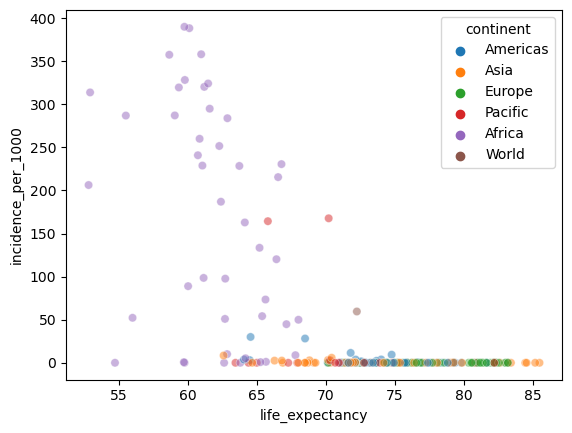

In [19]:
sns.scatterplot(x='life_expectancy', y='incidence_per_1000', data=df, alpha=0.5, hue = "continent");

📊 We can plot to relation between the two variables:

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='life_expectancy', ylabel='incidence_per_1000'>

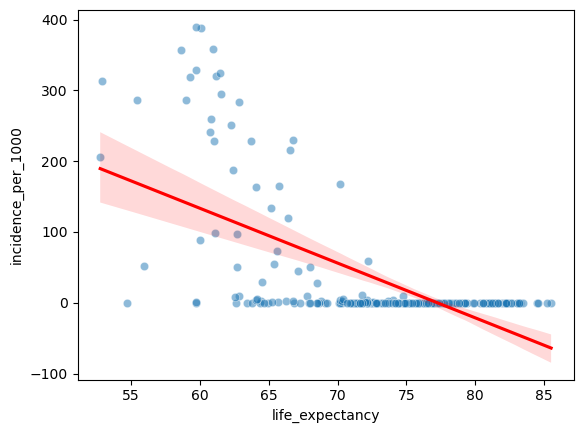

In [20]:
sns.scatterplot(x='life_expectancy', y='incidence_per_1000', data=df, alpha=0.5);
sns.regplot(x='life_expectancy', y='incidence_per_1000', data=df, scatter=False, color = 'red')

### Plot like a pro!
📈 Let's see all the relationships between our columns:

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

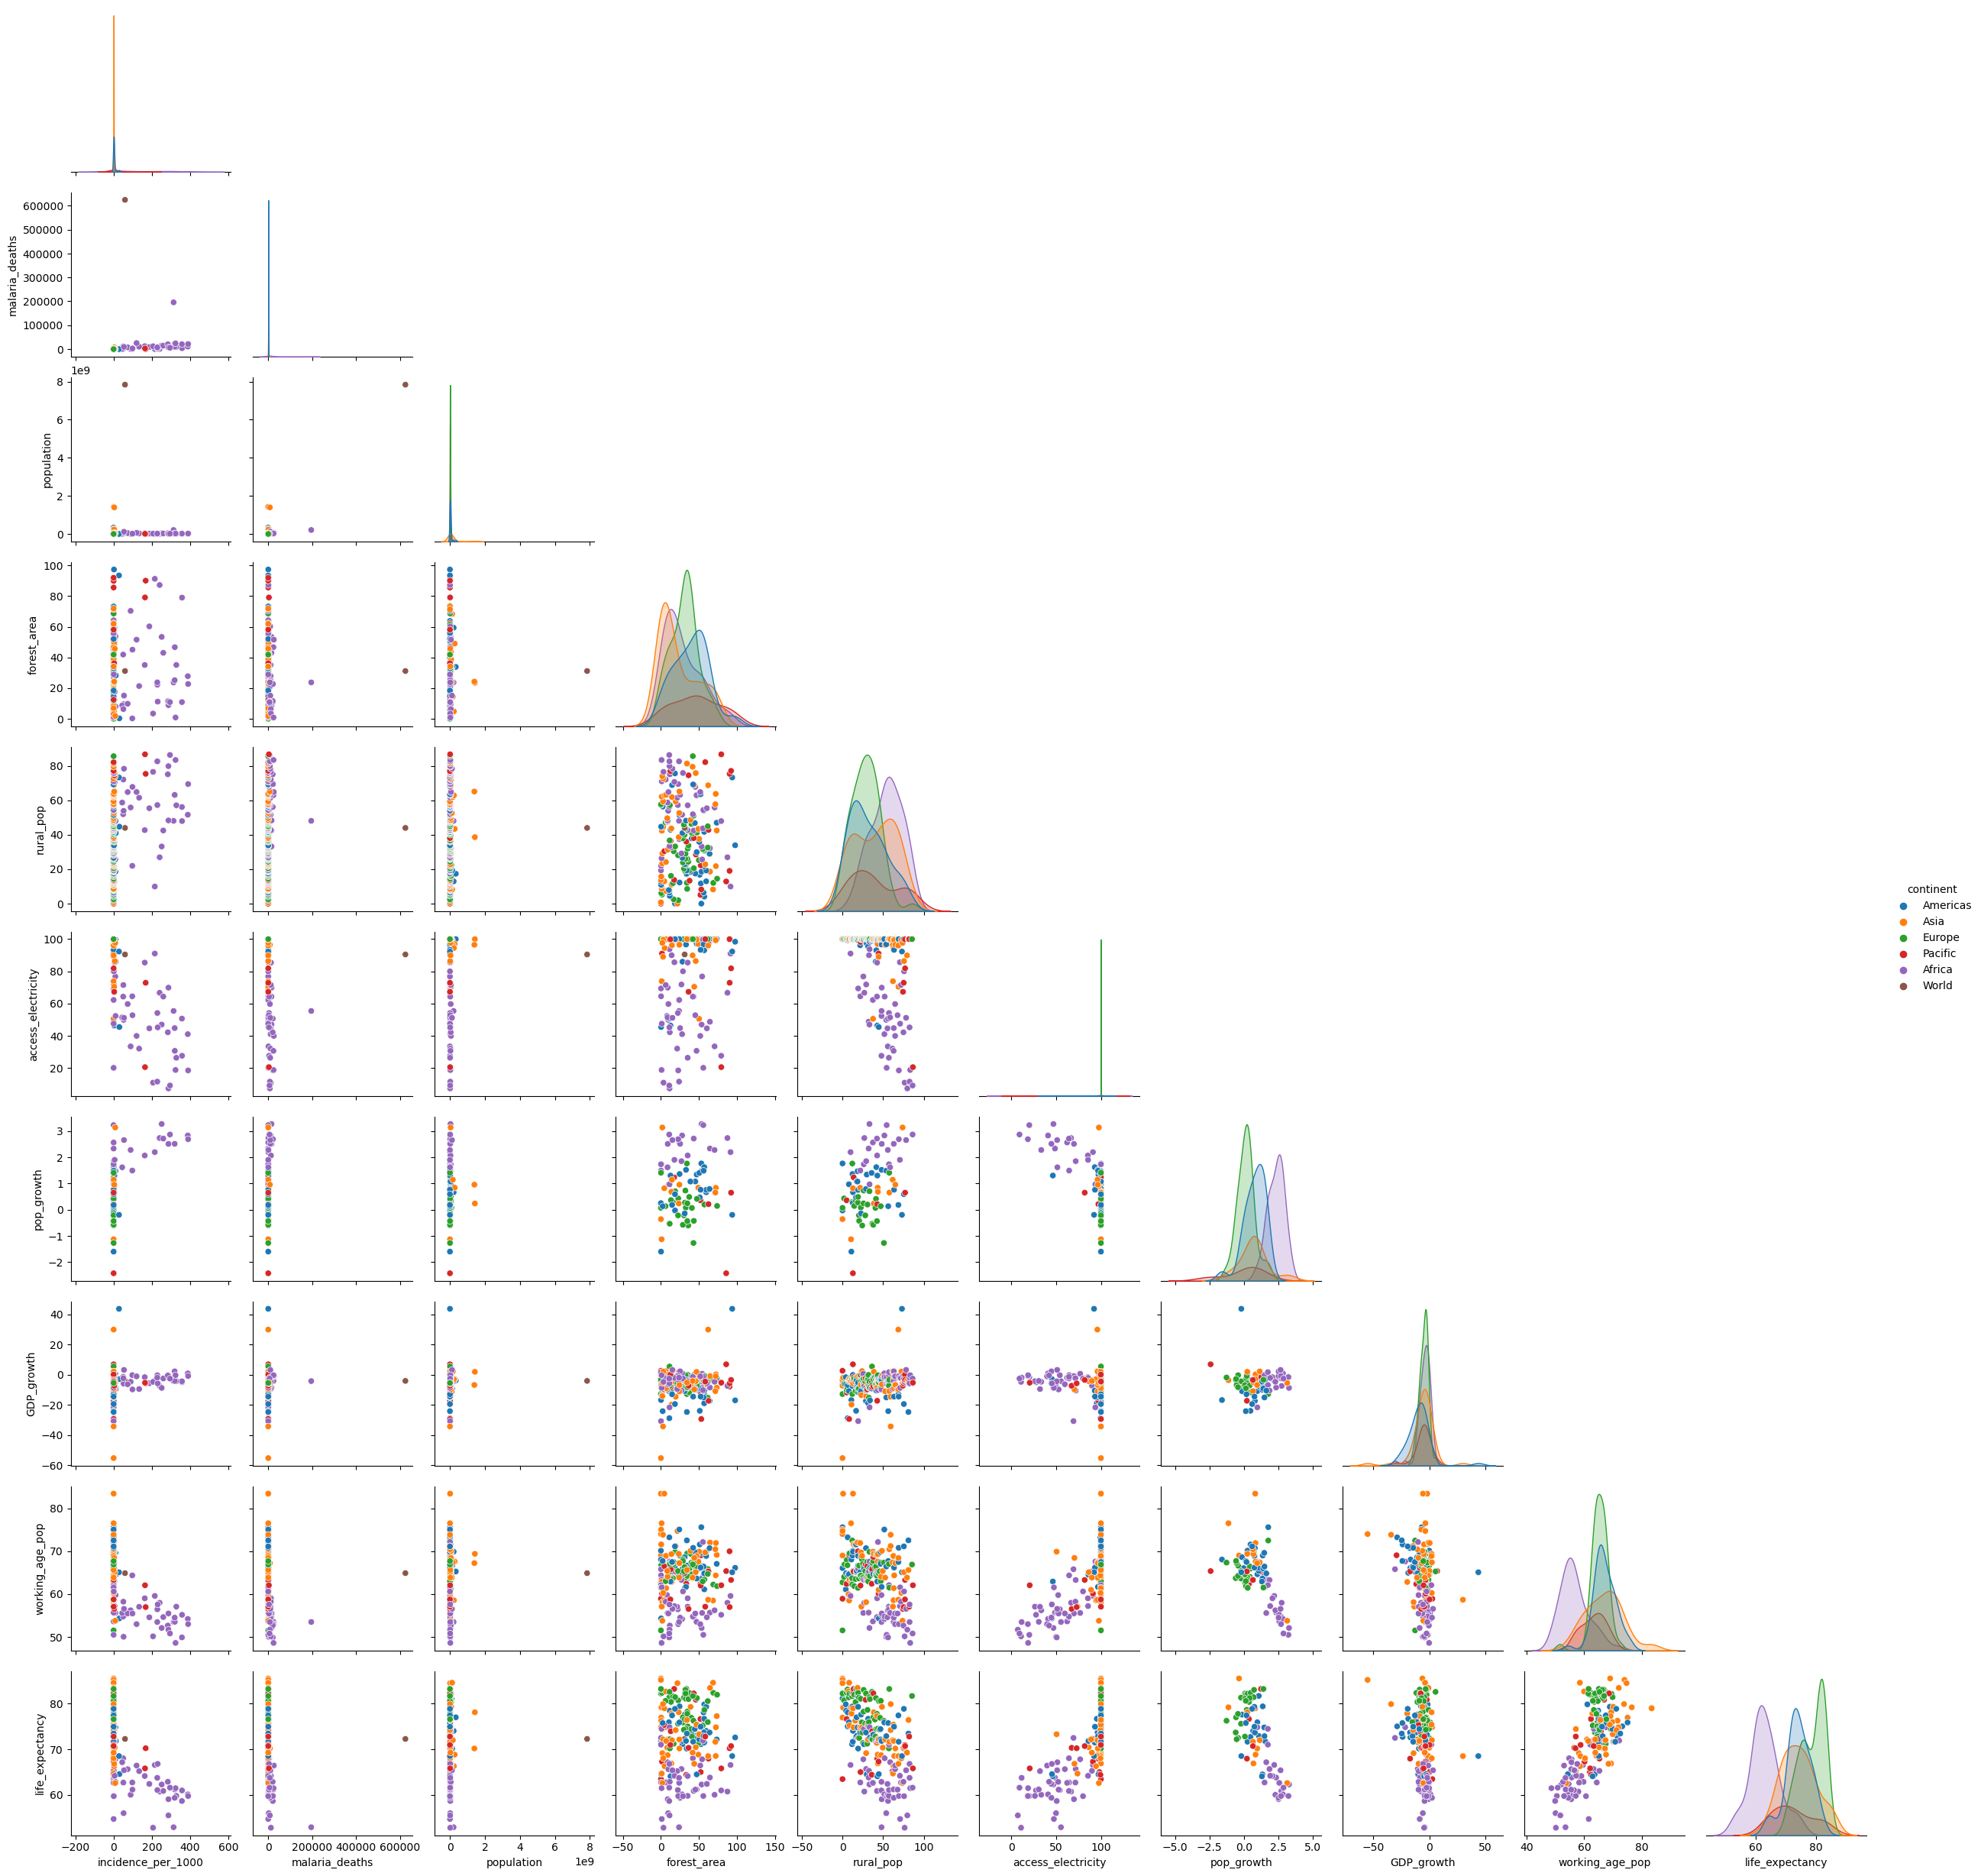

In [21]:
sns.pairplot(df, hue = 'continent', corner = True); #might require a few seconds to load

## 1. Data preparation

### Data cleaning

🧼 Let's save the initial shape of our dataframe to see how it evolves through cleaning. 

In [23]:
initial_shape = df.shape
initial_shape

(214, 13)

Before using the dataset, we need to make sure it is usable. 

👇 First, we clean all the NA (Non Applicable) values.

In [24]:
df_test = df.dropna()
noNA_shape = df_test.shape

print(f"The dataset size went from {initial_shape} to {noNA_shape} after cleaning all NAs.")

The dataset size went from (214, 13) to (73, 13) after cleaning all NAs.


😱 Oh, no! We lost a significant amount of data. Let's understand where those NAs are.

In [25]:
df.isna().sum()

country                 0
code                    0
continent               0
incidence_per_1000      0
malaria_deaths          0
population             28
forest_area             1
rural_pop               1
access_electricity      2
pop_growth            126
GDP_growth              9
working_age_pop         0
life_expectancy         8
dtype: int64

😌 It seems like only two columns are responsible for the most NAs. Let's delete those.

In [26]:
cols_to_remove = ["population", "pop_growth"]

df_cleaned = df.drop(columns = cols_to_remove)
df_cleaned.head()

,country,code,continent,incidence_per_1000,malaria_deaths,forest_area,rural_pop,access_electricity,GDP_growth,working_age_pop,life_expectancy
0,Bermuda,BMU,Americas,0.0,0,18.518518,0.0,100.0,-6.811710,66.048211,81.136000
1,Cayman Islands,CYM,Americas,0.0,0,53.000000,0.0,100.0,-6.767413,75.582561,NaN
2,Hong Kong,HKG,Asia,0.0,0,0.000000,0.0,100.0,-6.208755,68.995998,85.497561
3,Macao,MAC,Asia,0.0,0,0.000000,0.0,100.0,-55.188681,73.985595,85.184000
4,Kuwait,KWT,Asia,0.0,0,0.350730,0.0,100.0,-7.169357,75.041788,76.920000


In [27]:
df_cleaned.isna().sum()

country               0
code                  0
continent             0
incidence_per_1000    0
malaria_deaths        0
forest_area           1
rural_pop             1
access_electricity    2
GDP_growth            9
working_age_pop       0
life_expectancy       8
dtype: int64

🤗 Much better! Now we can delete the rows containing NAs without losing so much data.

In [28]:
df_cleaned = df_cleaned.dropna()
df_cleaned.shape

(196, 11)

👇 Then, we remove all duplicate values (if any).

In [29]:
df_cleaned = df_cleaned.drop_duplicates()

In real life, cleaning data includes [a lot more steps](https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea) and can get tricky.

Cleaning and preprocessing data can be the longest part of the process and can be considered the most important one. 

## 2. Model training

### Choosing your model

We start with the easiest model of them all: the linear regression, imported at the beginning on the notebook from the [Scikit-Learn](https://scikit-learn.org) library. 

<details><summary markdown='span'>Additional info
</summary>

  Scikit-Learn is an open source, well documented and honestly life saving initiative for all mahcine learning enthusiasts. 
  Do not hesitate to read their [documentation](https://scikit-learn.org/stable/user_guide.html) and explore their [tutorials](https://scikit-learn.org/stable/auto_examples/index.html). 

  A linear regression is a mathematical model that can be written as f(x) = ax + b
  where a is the slope and b is the intercept. 
</details>


In [30]:
model = LinearRegression()

👇 The model is now loaded under the `model` variable:

In [31]:
model

LinearRegression()

### Defining the feature and the target

Let's start with a simple model.

We assume that malaria incidence can be predicted with the life expectancy of a country.

👇 We define that our feature `X` is `life_expectancy` and our target `y` is `incidence_per_1000`.

Text(0, 0.5, 'incidence per 1000')

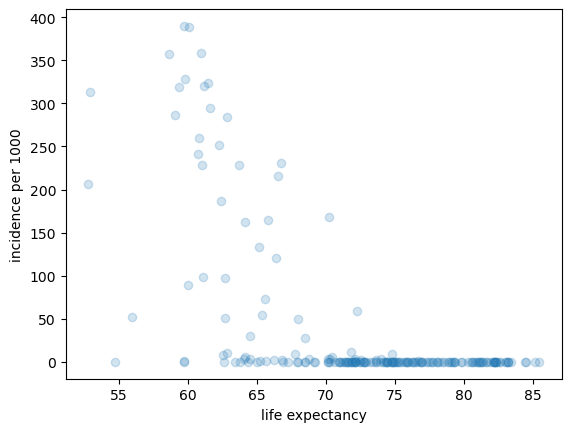

In [32]:
X = df_cleaned[['life_expectancy']]
y = df_cleaned[['incidence_per_1000']]

plt.scatter(X, y, alpha = 0.2)

plt.xlabel('life expectancy')
plt.ylabel('incidence per 1000')

### Reserving some data for validation

⚡ This is a very important step!

To be able to properly assess the efficacy of our model, we should keep some data 'unseen'.
It means dividing the dataset into a `training` part and a `testing` part. 

Steps:
1. the model learns on some part of the dataset
2. the model predicts using the other part: it uses the feature(s) `X` to make a prediction of the target `y`. 
3. we compare the prediction and the true values

👇  We first choose the proportion of data kept for `testing`. It is usually 0.2 or 0.3, meaning 20 or 30%, selected at random. 

In [33]:
size = 0.3

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size)


In [35]:
X_train.head()

,life_expectancy
50,74.769
29,77.804
176,68.497
136,72.126
122,67.924


In [36]:
y_train.head()

,incidence_per_1000
50,9.409265
29,0.000000
176,0.000000
136,0.000000
122,0.000000


❓ What do you expect the approximative shapes of `X_test` and `y_test` will be?

👇 Print the shapes of `X_test` and `y_test` below.

In [37]:
X_test.shape

(59, 1)

In [38]:
y_test.shape

(59, 1)

<details><summary markdown='span'>View solution
</summary>

```python
print(X_test.shape, y_test.shape)
```

</details>

### Fitting your model

👇 We make the model learn from the `training` dataset:

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

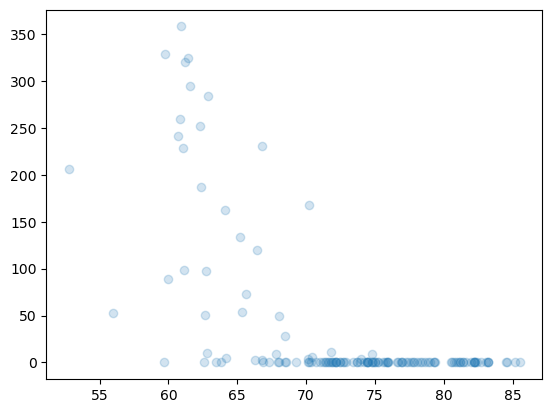

In [39]:
model_fitted = model.fit(X_train, y_train)

plt.scatter(X_train, y_train, alpha = 0.2)

# 3. Model prediction

👇 Then, we can ask the model to predict malaria incidence values `y` from the the values of life expectancy `X` it has not seen before. 

In [40]:
prediction = model_fitted.predict(X_test)

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


👇 Here, we can see the predicted values calculated from `X_test` in red, against the actual values from `X_train`, `y_train` in blue.

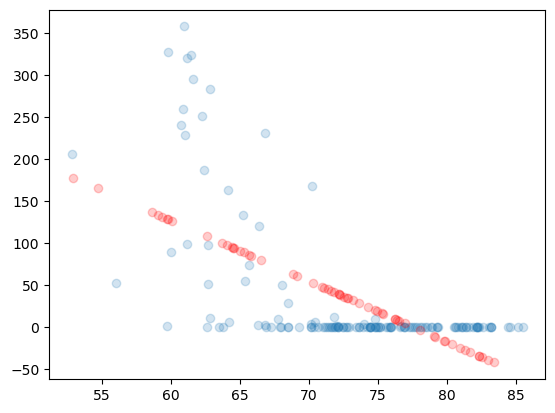

In [41]:
plt.scatter(X_train, y_train, alpha = .2),
plt.scatter(X_test, prediction, alpha = .2, color = 'red')

🤔 It seems that our model is not doing an excellent job...

👇 But how much of a bad prediction is that? Let's measure it!

## 4. Model evaluation

### R2 score

In [42]:
model_score_baseline = model_fitted.score(X_test, y_test)
print("Model R2 score:", round(model_score_baseline, 2))

Model R2 score: 0.36


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

<details><summary markdown='span'>What is the R2 score?
</summary>

In linear regression, the R-squared score (also known as the coefficient of determination) measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

A higher R-squared score indicates that the model explains a larger portion of the variability in the dependent variable, suggesting a stronger relationship between the independent and dependent variables.
</details>

### Accuracy

In [43]:
accuracy_baseline = cross_val_score(model_fitted, X_train, y_train).mean()
print("Model accuracy:", round(accuracy_baseline, 2))

Model accuracy: 0.33


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

<details><summary markdown='span'>What is accuracy?
</summary>

Model accuracy is defined as the percentage of correct classifications made by the model, calculated by dividing the number of correct predictions by the total number of predictions across all classes. 

This metric is expressed as a value between 0 and 1 (or 0% and 100%), where 0 indicates the model always predicts incorrectly, and 1 (or 100%) signifies that it always predicts correctly.

</details>

👇 We will now try to improve our model and increase the scores, which are currently low.

# 5. Improving the model

## Option 1: More features

### Defining the features

🔁 We can repeat this workflow, including more variables from our dataset. 
To do so, we change our features `X` to include more columns, and we keep `y` as is. 

In [44]:
Xs = df_cleaned[['life_expectancy', 'forest_area', 'rural_pop', 'access_electricity', 'GDP_growth', 'working_age_pop']]
y = df_cleaned[['incidence_per_1000']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = size)


In [46]:
X_train.head()

,life_expectancy,forest_area,rural_pop,access_electricity,GDP_growth,working_age_pop
25,75.184,1.098047,8.582,99.900000,-3.184434,63.329030
177,65.614,9.828453,64.747,59.695698,-6.250228,55.484363
89,76.657,56.805608,31.586,95.336014,-18.854382,64.957463
18,78.041,55.956032,6.419,100.000000,-6.767756,64.354822
4,76.920,0.350730,0.000,100.000000,-7.169357,75.041788


👇 The shape of our features `X` will now be different from before:

In [47]:
X_train.shape

(137, 6)

👇  However, `y_train` remains the same:

In [48]:
y_train.shape

(137, 1)

### Fitting the model 

In [49]:
model_fitted2 = model.fit(X_train, y_train)

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

### Evaluating the model

In [50]:
model_score2 = model_fitted2.score(X_test, y_test)
print("Model R2 score:", round(model_score2, 2))

Model R2 score: 0.51


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

In [51]:
accuracy2 = cross_val_score(model_fitted2, X_train, y_train).mean()
print("Model accuracy:", round(accuracy2, 2))

Model accuracy: 0.56


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

🙌 Our model improved!

There is still a long way to go, but you get the gist...

### Prediction

Let's compare the updated prediction to the previous one: 

🔮 First by making a new `prediction` with the `testing` data:

In [52]:
prediction2 = model_fitted.predict(X_test)

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


📊 Then creating the plot by choosing the `life expectancy` variable:

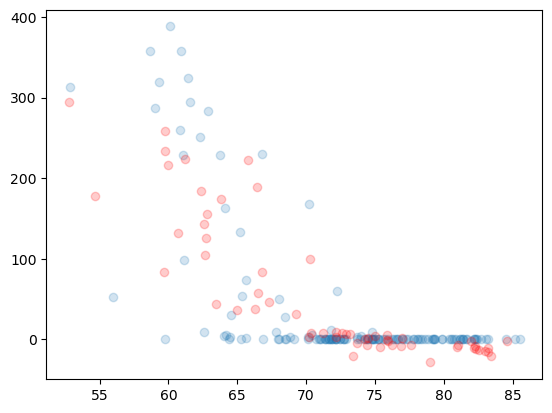

In [53]:
plt.scatter(X_train['life_expectancy'], y_train, alpha = .2),
plt.scatter(X_test['life_expectancy'], prediction2, alpha = .2, color = 'red')

How would you plot the `prediction` of the malaria incidence `y` against an other variable, such as `working_age_pop`? 

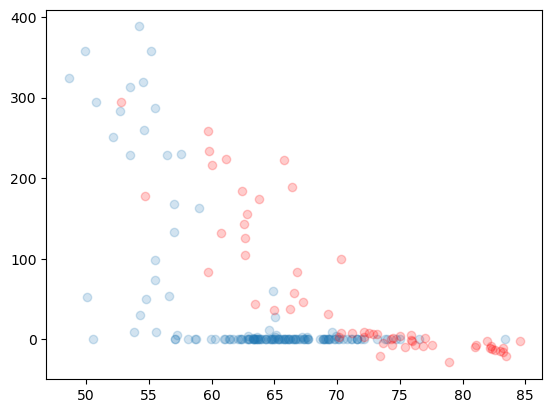

In [54]:
plt.scatter(X_train['working_age_pop'], y_train, alpha = .2),
plt.scatter(X_test['life_expectancy'], prediction2, alpha = .2, color = 'red')

<details><summary markdown='span'>View solution
</summary>
plt.scatter(X_train['working_age_pop'], y_train, alpha = .2),
plt.scatter(X_test['life_expectancy'], prediction2, alpha = .2, color = 'red')
</details>

### Features importance

📊 Let's plot the importance of each feature:

First we create a dataframe that includes the name of the `features` and their respective `importance` in the `model`:

In [55]:
features = pd.DataFrame(X_train.columns)
features.columns = ['features']

importance = pd.DataFrame(abs(model_fitted2.coef_.T))
importance.columns = ['importance']

result = pd.concat([features, importance], axis=1).sort_values(by='importance', ascending = False)

📉 Then we plot:

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

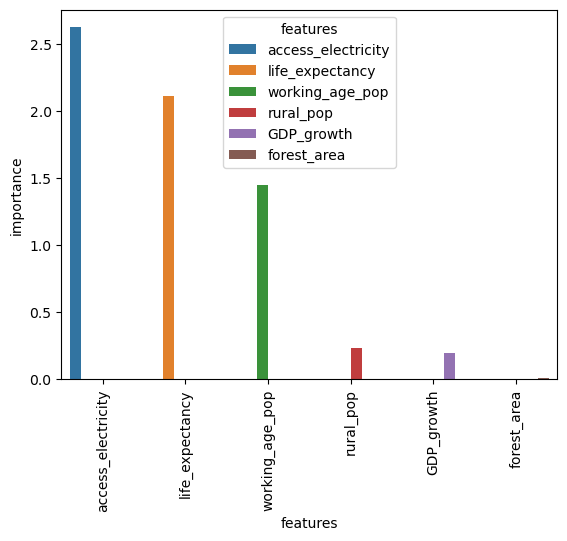

In [56]:
ax = sns.barplot(x = 'features', y = 'importance', hue = 'features', data = result)
ax.tick_params(axis = 'x', rotation = 90)

❓ Which feature was the most important?

👇  Uncomment and complete the code below.

access_electricity is the most important feature

If you made it this far, great!

The rest of the notebook is optional, you can keep going if you have plenty of time or keep them for later (or never!), they will stay online and openly available.

### Option 2: A different model

### Ridge Regression

Let's import a different model from Sickit-Learn: the <b>Ridge</b>.

<details><summary markdown='span'>About Ridge
</summary>
The primary difference between Ridge Regression and Linear Regression in scikit-learn lies in the addition of a regularization term in Ridge Regression, which helps prevent overfitting by penalizing large coefficients.

</details>

In [57]:
model_ridge = Ridge()
model_ridge

Ridge()

👇 Fit `model ridge` to `(X_train, y_train)` and save the fitted model as `model_fitted3`

In [58]:
model_fitted3 = model_ridge.fit(X_train, y_train)

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

<details><summary markdown='span'>View solution
</summary>

```python
model_fitted3 = model_ridge.fit(X_train, y_train)
```

</details>

👇 Calculate the R2 score and save the result as `model_score3`: 

In [59]:
model_score3 = model_fitted3.score(X_test, y_test)

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

<details><summary markdown='span'>View solution
</summary>

```python
model_score3 = model_fitted3.score(X_test, y_test)
```

</details>

👇 Calculate the model accuracy and save the result as `accuracy3`: 

In [60]:
accuracy3 = cross_val_score(model_fitted3, X_train, y_train).mean()

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

<details><summary markdown='span'>View solution
</summary>

```python
accuracy3 = cross_val_score(model_fitted3, X_train, y_train).mean()
```

</details>

This model should be more accurate than the baseline one. Run the cell below to verify:

In [61]:
if model_score3 > model_score_baseline and accuracy3 > accuracy_baseline:
    print("This model performs better than the baseline one. All correct!")
else:
    print("Something's not right... Have a look at your code to correct it or call Anaïs/ Asia!")

This model performs better than the baseline one. All correct!


💡 Here, we expect to get a similar score and accuracy than previously obtained with `LinearRegression()`, because they are both based on the same mathematical principle.

👇 Let's define a function to help us define if two metrics are almost equal:

In [62]:
def compare_values(value1, value2, decimal):
    try:
        np.testing.assert_almost_equal(value1, value2, decimal=decimal)
        print("Values are almost equal.")
    except AssertionError:
        print("Values are not almost equal.")

❓ How would you test if `model_score2` and `model_score3` are almost equal (by 3 decimals)? 

👇 Write your code in the cell below.

In [63]:
decimal = 3
compare_values(model_score2, model_score3, decimal)

Values are almost equal.


<details><summary markdown='span'>View solution
</summary>

```python
decimal = 3
compare_values(model_score2, model_score3, decimal)
```

</details>

❓ What about `accuracy2` and `accuracy3`? 

👇 Write your code in the cell below.

In [64]:
compare_values(accuracy2, accuracy3, decimal)

Values are almost equal.


<details><summary markdown='span'>View solution
</summary>

```python
compare_values(accuracy2, accuracy3, decimal)
```

</details>

<details><summary markdown='span'>More on Regression Models
</summary>

[Other regression models](https://scikit-learn.org/stable/modules/linear_model.html) exist, such as Lasso or Elastic Net. 

The choice between all available methods should be guided by the specific characteristics of the dataset and the objectives of the analysis.

Do not hesitate to read [more](https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29) on the topic!

</details>

### Polynomial Features

🔥 Another option is to make our linear model handle non-linear relationship... That sounds very conterintuitive but it can be done through <b>polynomial features</b>.

Let's got through the basic steps. Do not hesitate to modify the code to explore more of it!

In [65]:
#defining the degrees
degrees = 2

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

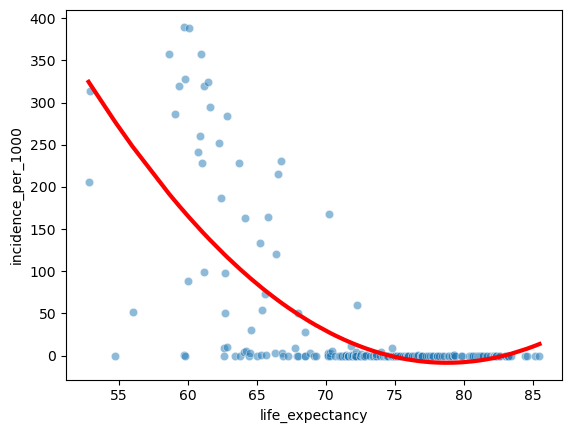

In [66]:
#sorting the values
sorted_df = df_cleaned.sort_values('life_expectancy')

#defining the feature and target
X_sorted = sorted_df[['life_expectancy']]
y_sorted = sorted_df['incidence_per_1000']

#creating our polynomial features
poly_features = PolynomialFeatures(degree=degrees, include_bias=False)
X_poly = poly_features.fit_transform(X_sorted)

#fitting model
model_poly = model.fit(X_poly, y_sorted)

#predicting
predictions = model_poly.predict(X_poly)

#plotting predictions over original data
sns.scatterplot(x=X_sorted['life_expectancy'], y=y_sorted, alpha=0.5)
plt.plot(X_sorted['life_expectancy'], predictions, linewidth=3, color='r')

In [67]:
#scoring the model
score_poly = model_fitted.score(X_poly, y_sorted)
print("Model R2 score:", round(score_poly, 2))

Model R2 score: 0.49


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### Option 3: Joining different datasets


Machine Learning is mostly about data.

By creating bigger datasets, we might (or not!) improve the scores and the capacities of our model.

In [68]:
df_gdp = pd.read_csv("./data/workshop/GDPpercapita.csv")
df_gdp.describe()

,GDP_per_capita
count,258.000000
mean,16206.106432
std,24484.942337
min,216.827417
25%,2131.329165
50%,6188.234459
75%,19460.492775
max,182537.387400


👇 We join the datasets by matching their `country` columns: 

In [69]:
df_complete = pd.merge(df, df_gdp, how = 'left', on = 'country')
df_complete.head()

,country,code,continent,incidence_per_1000,malaria_deaths,population,forest_area,rural_pop,access_electricity,pop_growth,GDP_growth,working_age_pop,life_expectancy,GDP_per_capita
0,Bermuda,BMU,Americas,0.0,0,64051.0,18.518518,0.0,100.0,-0.028168,-6.811710,66.048211,81.136000,107791.88640
1,Cayman Islands,CYM,Americas,0.0,0,67327.0,53.000000,0.0,100.0,1.764068,-6.767413,75.582561,NaN,83897.50544
2,Hong Kong,HKG,Asia,0.0,0,NaN,0.000000,0.0,100.0,-0.358933,-6.208755,68.995998,85.497561,NaN
3,Macao,MAC,Asia,0.0,0,NaN,0.000000,0.0,100.0,NaN,-55.188681,73.985595,85.184000,NaN
4,Kuwait,KWT,Asia,0.0,0,4360451.0,0.350730,0.0,100.0,NaN,-7.169357,75.041788,76.920000,24297.71080


You now have a whole new feature to test on!
Ideally, we would look for more specific data on malaria, such as mosquito net coverage, access to treatment... But it is difficult to obtain clean, standardised data at a global scale. 

### Option 4: Actual preprocessing

To make the notebook easy to follow, we skipped an important step of preprocessing: <b>Data Scaling</b>. 

You can have a look at [how you can implement it](https://betterdatascience.com/data-scaling-for-machine-learning/) and try it on your own if you feel confident. 

### Option 5: Your own solution!

Possibilities are almost endless and even if we have to adhere to good practices, your creativity can save the day!

Do not hesitate to explore the [available tools](https://scikit-learn.org/stable/index.html), to look for [new data](https://www.kaggle.com/) to analyse, or check regurlarly this [repo](https://github.com/APepey/ML-workshop) for new resources and challenges!